In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Predictive_Modeling_for_Energy_Usage

/content/drive/MyDrive/Predictive_Modeling_for_Energy_Usage


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import joblib


# Load the saved LSTM model and scaler
model = load_model("LSTM-Model.h5")
scaler = joblib.load("scaler.pkl")

print("✅ Model and Scaler loaded successfully!")

✅ Model and Scaler loaded successfully!


In [ ]:
df = pd.read_csv("events.csv")
print(df.columns)

Index(['Start time UTC', 'End time UTC', 'Start time UTC+03:00',
       'End time UTC+03:00', 'Electricity consumption in Finland'],
      dtype='object')


In [ ]:
# Load your dataset
df = pd.read_csv("events.csv", parse_dates=["Start time UTC"], index_col="Start time UTC")

# Resample to daily frequency
df_daily = df.resample("D").sum()

# Select the feature column used during training
df_selected = df_daily[["Electricity consumption in Finland"]]

# ----> Define n_days here
n_days = 60  # or any desired number of previous days for input

# ----> Scale the input data
scaled_input = scaler.fit_transform(df_selected.values)

# Initialize 'predictions' as an empty list before the loop
predictions = []

# For last n days
for _ in range(60):
    X_input = scaled_input[-n_days:]  # Get the last n_days
    X_input = np.reshape(X_input, (1, X_input.shape[0], X_input.shape[1]))  # Shape for LSTM

    pred_scaled = model.predict(X_input, verbose=0)
    predictions.append(pred_scaled[0][0]) # Now you can append to the list

    # Append predicted value to sequence for next input
    scaled_input = np.vstack([scaled_input, [[pred_scaled[0][0]]]])

# After the loop, you can convert predictions to a NumPy array if needed
predictions = np.array(predictions).reshape(-1, 1)
predicted_actual = scaler.inverse_transform(predictions)

In [ ]:

# Load your dataset
df = pd.read_csv("events.csv", parse_dates=["Start time UTC"], index_col="Start time UTC")

# Resample to daily frequency
df_daily = df.resample("D").sum()

# Select the feature column used during training
df_selected = df_daily[["Electricity consumption in Finland"]]


In [ ]:
# Print all 60 predicted values with corresponding day numbers
print("📈 Predicted Electricity Consumption for Next 60 Days (in MWh):\n")
for i, value in enumerate(predicted_actual.flatten(), 1):
    print(f"Day {i}: {value:.2f} MWh")

📈 Predicted Electricity Consumption for Next 60 Days (in MWh):

Day 1: 243482.78 MWh
Day 2: 279566.00 MWh
Day 3: 300566.09 MWh
Day 4: 306654.50 MWh
Day 5: 299724.91 MWh
Day 6: 284231.09 MWh
Day 7: 274046.44 MWh
Day 8: 287561.22 MWh
Day 9: 315739.62 MWh
Day 10: 332554.94 MWh
Day 11: 337262.19 MWh
Day 12: 326999.59 MWh
Day 13: 307343.28 MWh
Day 14: 292909.78 MWh
Day 15: 304337.16 MWh
Day 16: 331040.19 MWh
Day 17: 343020.56 MWh
Day 18: 348970.16 MWh
Day 19: 342178.31 MWh
Day 20: 321484.53 MWh
Day 21: 302379.16 MWh
Day 22: 310636.50 MWh
Day 23: 336284.47 MWh
Day 24: 345958.03 MWh
Day 25: 352128.75 MWh
Day 26: 350239.72 MWh
Day 27: 332873.47 MWh
Day 28: 310409.69 MWh
Day 29: 313817.75 MWh
Day 30: 339798.84 MWh
Day 31: 349901.16 MWh
Day 32: 356819.41 MWh
Day 33: 361091.31 MWh
Day 34: 347927.53 MWh
Day 35: 323174.09 MWh
Day 36: 321292.03 MWh
Day 37: 347773.69 MWh
Day 38: 359716.59 MWh
Day 39: 367926.25 MWh
Day 40: 376070.25 MWh
Day 41: 365650.22 MWh
Day 42: 338954.00 MWh
Day 43: 332073.47 MWh

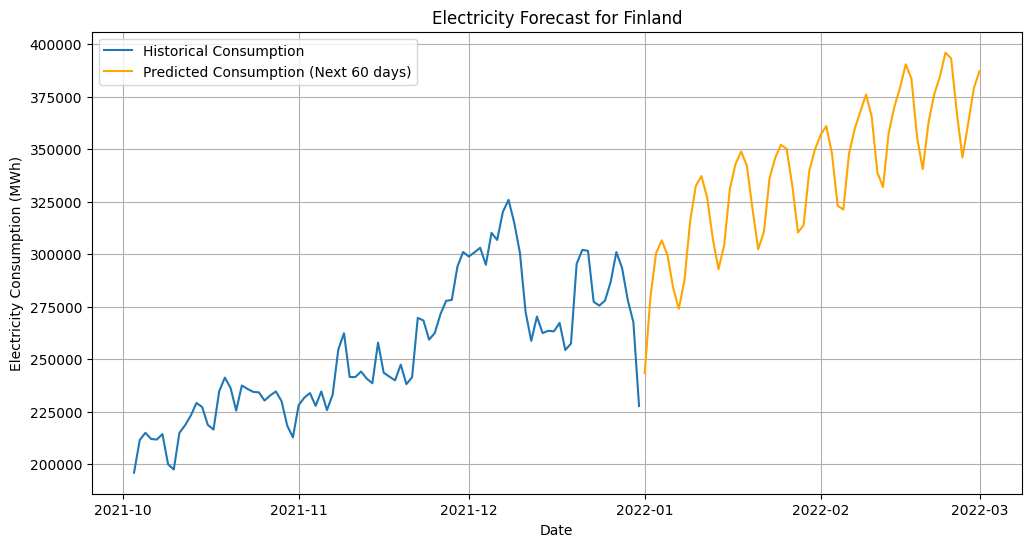

In [ ]:
# Future dates
last_date = df_selected.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60)

# DataFrame for forecast
forecast_df = pd.DataFrame(predicted_actual, index=future_dates, columns=["Predicted Consumption"])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_selected[-90:], label="Historical Consumption")
plt.plot(forecast_df, label="Predicted Consumption (Next 60 days)", color='orange')
plt.xlabel("Date")
plt.ylabel("Electricity Consumption (MWh)")
plt.title("Electricity Forecast for Finland")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Save forecast_df to a CSV file
forecast_df.to_csv("electricity_forecast_n_days.csv")
print("📁 Predictions saved to electricity_forecast_n_days.csv")